# References

- Vectice Documentation: https://docs.vectice.com/
- Vectice API Documentation: https://api-docs.vectice.com/

In [3]:
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## Install the latest Vectice Python client library

In [ ]:
%pip install --q vectice -U

## Get started by connecting to Vectice

In [47]:
import vectice as vect

vec = vect.connect(config="My-token.json") #Put your own token

VECTICE_API_ENDPOINT is deprecated and will be removed in 23.3.1.0, please use VECTICE_HOST instead.
Welcome, bdaversa. You`re now successfully connected to Vectice.

To access your personal workspace, use connection.my_workspace
To access a specific workspace, use connection.workspace(Workspace ID)
To get a list of workspaces you can access and their IDs, use connection.list_workspaces()

If you are using a notebook you can call the help by using a Vectice returned object with the builtin notebook "?":
>> connection?

If you are using an IDE you can call the help() method on any object returned by Vectice:
>> help(connection)

For quick access to your default workspace in the Vectice web app, visit:
https://qa.vectice.com/browse/workspace/WSP-309


## Specify which project phase you want to document
In Vectice UI, navigate to your personal workspace inside your default Tutorial project go to the Data Understanding phase and copy paste your Phase Id below.

In [48]:
phase = vec.phase("PHA-xxxx") #Put your own Data Understanding Phase ID

Phase 'Data Understanding' successfully retrieved."

For quick access to the Phase in the Vectice web app, visit:
https://qa.vectice.com/browse/phase/PHA-5858


## Next we are going to create an iteration
An iteration allows you to organize your work in repeatable sequences of steps. You can have multiple iteration within a phase

In [49]:
iteration = phase.create_iteration()

New Iteration number '1' created.

For quick access to the Iteration in the Vectice web app, visit:
https://qa.vectice.com/browse/iteration/ITR-2255


In [4]:
df = pd.read_csv("https://raw.githubusercontent.com/vectice/GettingStarted/23.2.4.1-Tutorial_update/23.2/tutorial/SampleSuperstore.csv", converters = {'Postal Code': str})

### Push a dataset
Use the following code block to create a local dataset and generate an image:

In [51]:
origin_ds = vect.FileResource(paths="SampleSuperstore.csv", dataframes=df)


origin_dataset = vect.Dataset.origin(
    name="ProductSales Origin",
    resource=origin_ds, 
)

File: SampleSuperstore.csv wrapped successfully.


In [52]:
iteration.step_collect_initial_data = origin_dataset

Capturing diff failed for file: 23.2/tutorial/Data_Preparation.ipynb
Capturing diff failed for file: 23.2/tutorial/Data_Understanding.ipynb
Capturing diff failed for file: 23.2/tutorial/Model Retraining.ipynb
Capturing diff failed for file: 23.2/tutorial/Modeling_LR.ipynb
Code captured the following changed files; 23.2/tutorial/Data Preparation.ipynb, 23.2/tutorial/Data Understanding.ipynb, 23.2/tutorial/Model Deployment.ipynb, 23.2/tutorial/Model Staging.ipynb, 23.2/tutorial/Modeling.ipynb
New Dataset: 'ProductSales Origin' Version: 'Version 1' added to Step: Collect Initial Data
Attachments: None
Link to Step: https://qa.vectice.com/browse/iteration/ITR-2255



In [53]:
iteration.step_describe_data = str(df.columns.values)

Added Comment to Step: Describe Data

Link to Step: https://qa.vectice.com/browse/iteration/ITR-2255



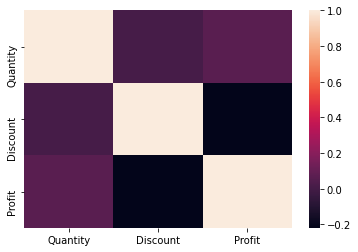

In [5]:
## Checking for Multicollinearity
corr_matrix=df.select_dtypes("number").drop("Sales",axis=1).corr()
sns.heatmap(corr_matrix);
plt.savefig("corr_matrix.png")

## Push images

You can add multiple items to a single step by using the `+=` operator.

In [55]:
iteration.step_explore_data += "corr_matrix.png"

Added Image: 'corr_matrix.png' to Step: Explore data

Link to Step: https://qa.vectice.com/browse/iteration/ITR-2255



/var/folders/db/rdyx07495wxbzv8q924p0tph0000gn/T/ipykernel_2825/862432529.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["Quantity"])


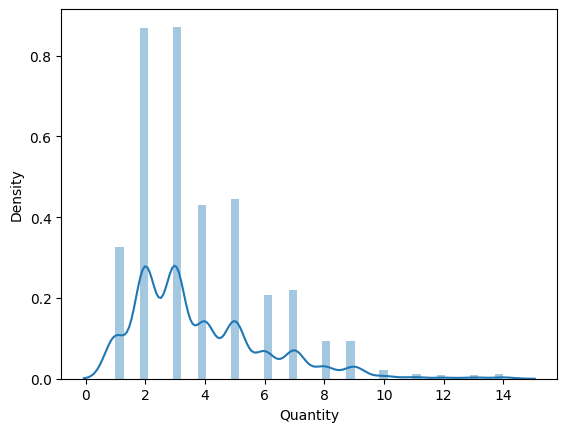

In [56]:
#Checking for outliers
sns.distplot(df["Quantity"])
plt.savefig("Quantity.png")

In [57]:
iteration.step_explore_data += "Quantity.png"

Added Image: 'Quantity.png' to Step: Explore data

Link to Step: https://qa.vectice.com/browse/iteration/ITR-2255



In [58]:
iteration.complete()

Iteration with index 1 completed.

For quick access to the Iteration in the Vectice web app, visit:
https://qa.vectice.com/browse/iteration/ITR-2255
